# Logistic Regression

#### Build logistic regression model to predict whether a customer will invest in a long term fixed deposit or not, based on various factors in the bank customer dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
bank_df = pd.read_csv(r"D:\360digi\DS\Sharath\Logistic_Regression_1\handson\Datasets-Day32-Logistic Regression\bank_data.csv")
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [4]:
bank_df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
bank_df['y'].unique()

array([0, 1], dtype=int64)

In [6]:
# change the datatype 
bank_df = pd.DataFrame(bank_df.astype(int))
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int32
 1   default          45211 non-null  int32
 2   balance          45211 non-null  int32
 3   housing          45211 non-null  int32
 4   loan             45211 non-null  int32
 5   duration         45211 non-null  int32
 6   campaign         45211 non-null  int32
 7   pdays            45211 non-null  int32
 8   previous         45211 non-null  int32
 9   poutfailure      45211 non-null  int32
 10  poutother        45211 non-null  int32
 11  poutsuccess      45211 non-null  int32
 12  poutunknown      45211 non-null  int32
 13  con_cellular     45211 non-null  int32
 14  con_telephone    45211 non-null  int32
 15  con_unknown      45211 non-null  int32
 16  divorced         45211 non-null  int32
 17  married          45211 non-null  int32
 18  single

## Data Preprocessing

In [7]:
bank_df.isna().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [8]:
bank_df.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [9]:
# Seperating input and output variables 
X = pd.DataFrame(bank_df.iloc[:, :31])
Y = pd.DataFrame(bank_df.iloc[:, 31])

In [10]:
X.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


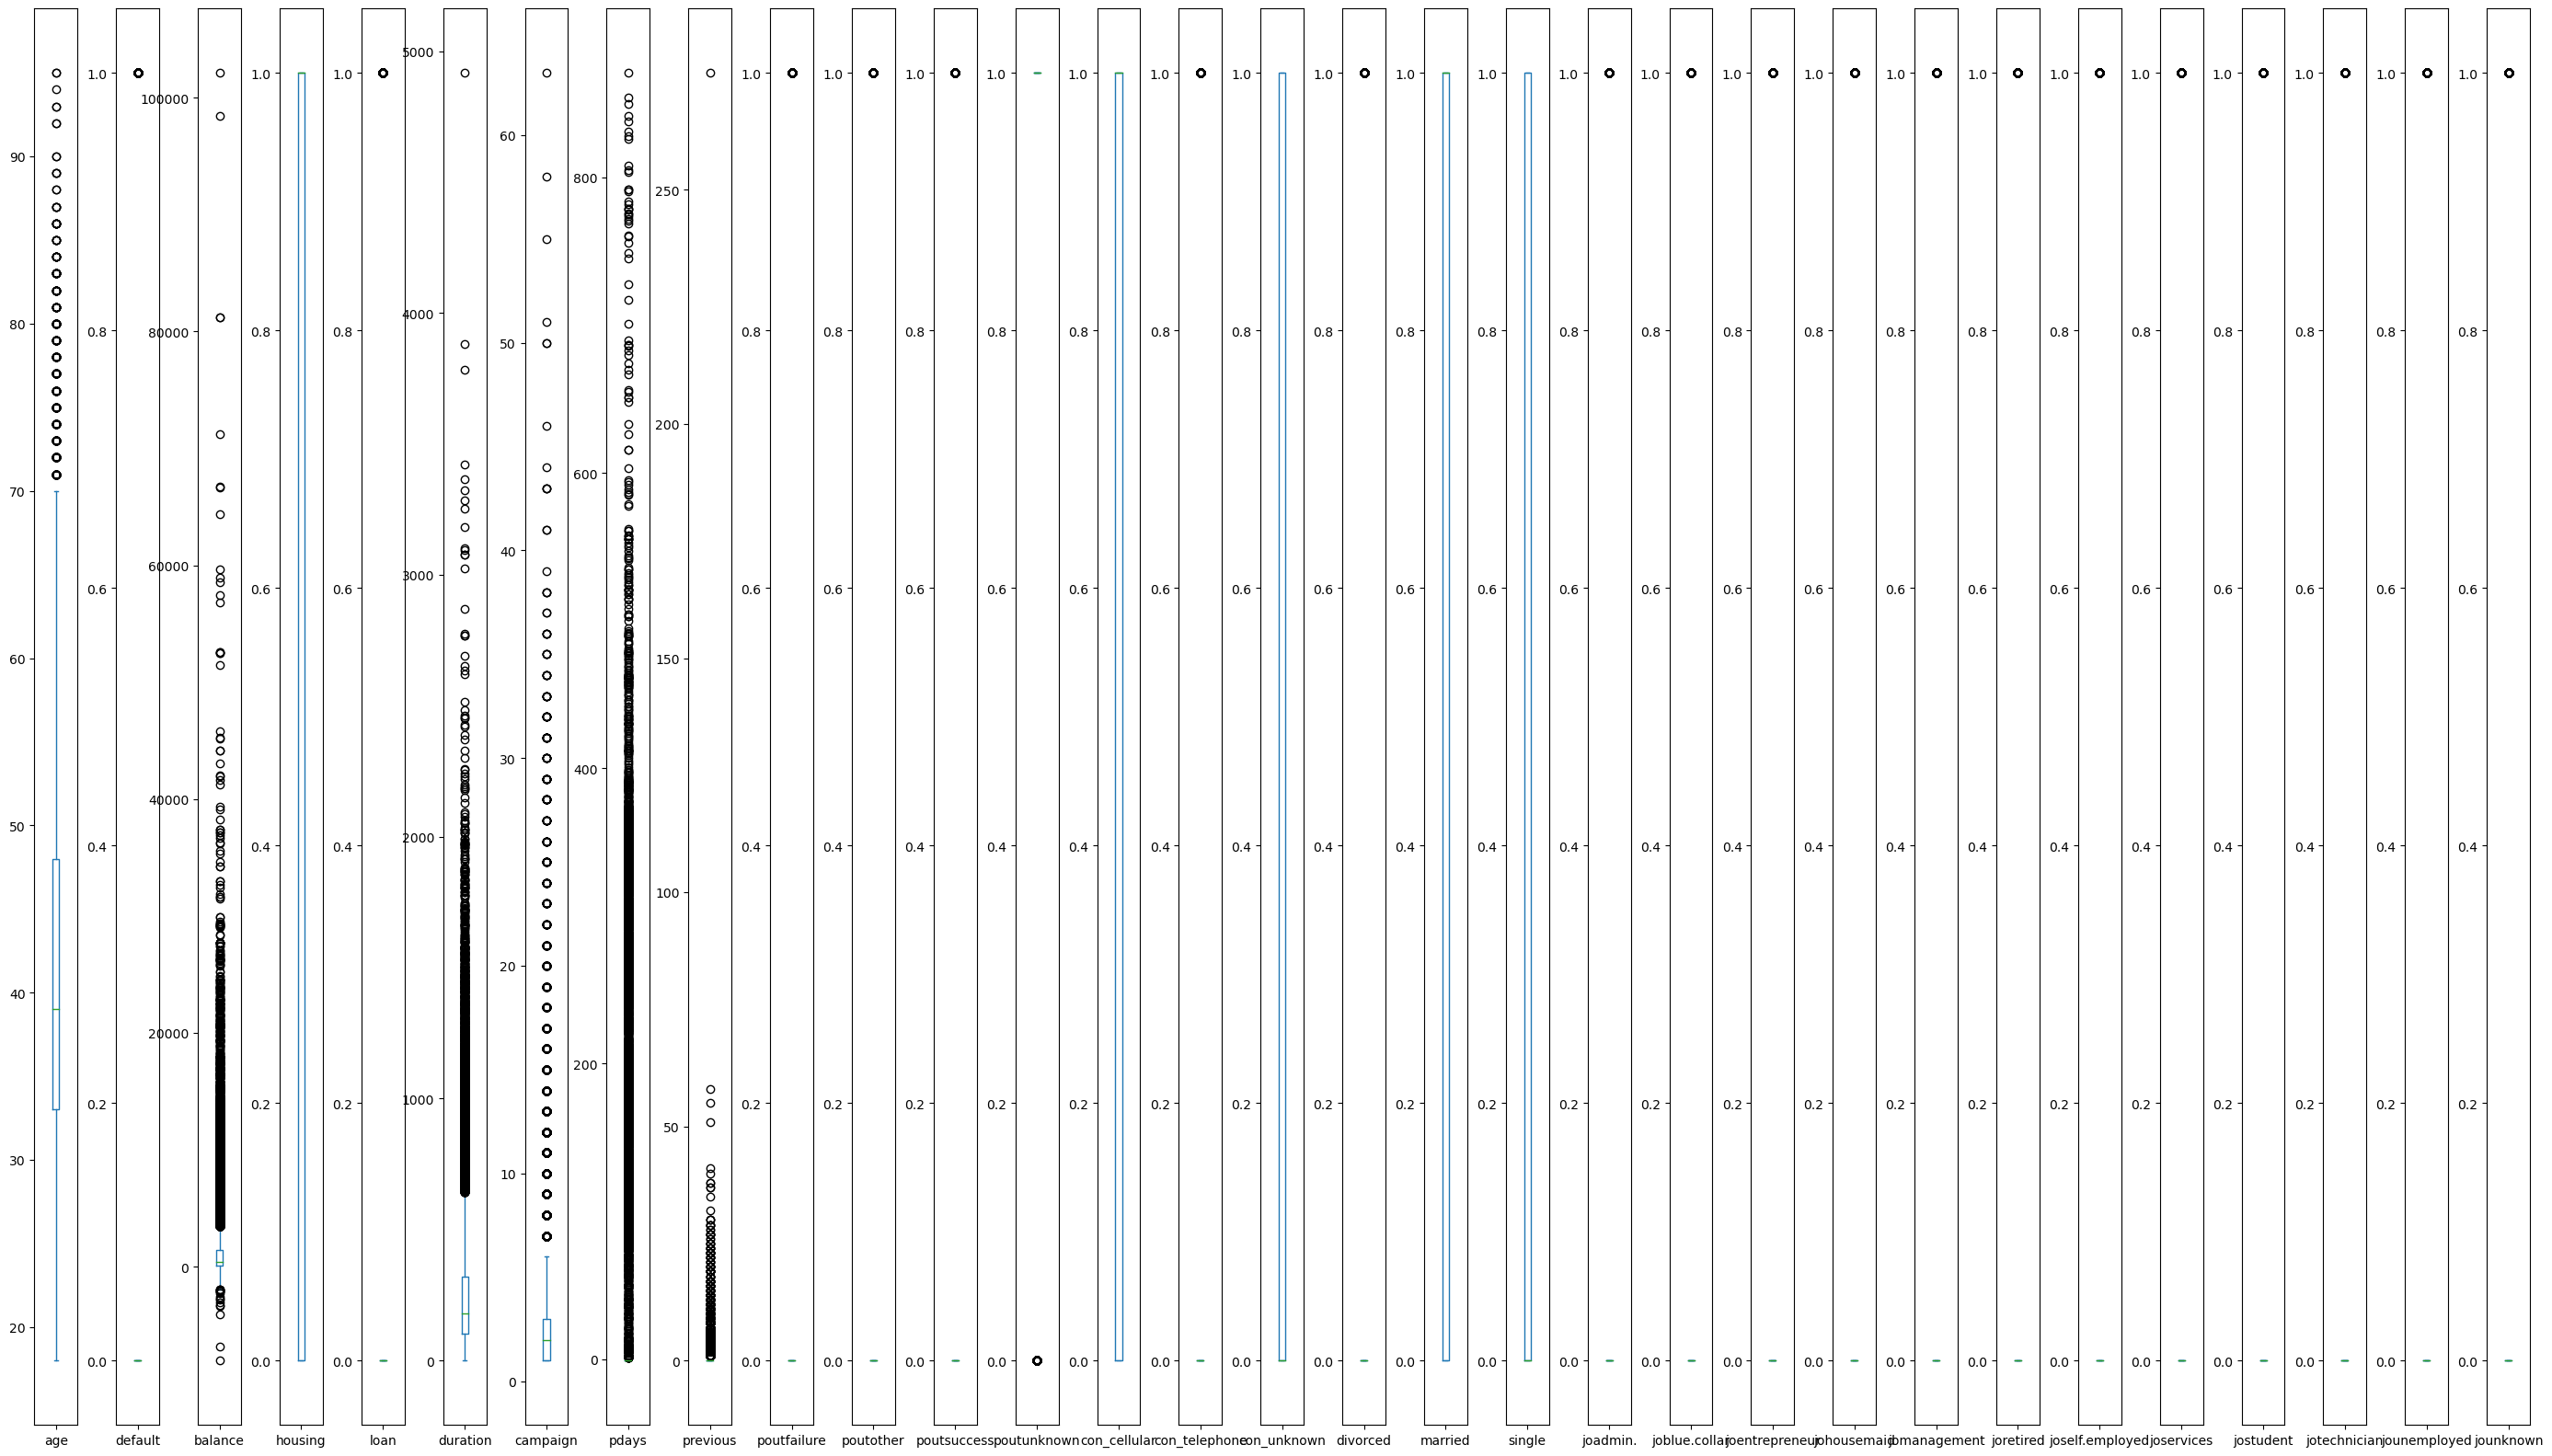

In [11]:
# box plot visualisation
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (35,20))
plt.subplots_adjust(wspace = 0.9)
plt.show()
#age, balance, duration, campaign, pdays, previous

In [12]:
# Input columns ['default', 'loan', 'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess', 'poutunknown', 'con_telephone', 'divorced', 'joadmin.', 'joblue.collar', 'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired', 'joself.employed', 'joservices', 'jostudent', 'jotechnician', 'jounemployed', 'jounknown'] have low variation for method 'iqr'. Try other capping methods or drop these columns.

In [12]:
numeric_features = X.select_dtypes(exclude = ['object']).columns
numeric_features

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown'],
      dtype='object')

In [13]:
# selecting columns with standard deviation > 0.6
col = X[X.columns[X.std() > 0.6]]
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int32
 1   balance   45211 non-null  int32
 2   duration  45211 non-null  int32
 3   campaign  45211 non-null  int32
 4   pdays     45211 non-null  int32
 5   previous  45211 non-null  int32
dtypes: int32(6)
memory usage: 1.0 MB


In [14]:
# Still column pdays and previous has low variance and cannot be winsorized.

In [15]:
col_names = ['age', 'balance', 'duration', 'campaign']
col_names

['age', 'balance', 'duration', 'campaign']

In [16]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = list(col_names))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['age', 'balance', 'duration', 'campaign'])

In [17]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['age', 'balance', 'duration',
                                       'campaign']))])

In [18]:
preprocessor = ColumnTransformer(transformers = [('wins', outlier_pipeline, col_names)], remainder = 'passthrough')
print(preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['age',
                                                                        'balance',
                                                                        'duration',
                                                                        'campaign']))]),
                                 ['age', 'balance', 'duration', 'campaign'])])


In [19]:
clean = preprocessor.fit(X[col_names])
clean

ColumnTransformer(remainder='passthrough',
                  transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['age',
                                                                        'balance',
                                                                        'duration',
                                                                        'campaign']))]),
                                 ['age', 'balance', 'duration', 'campaign'])])

In [20]:
cleandata1 = pd.DataFrame(clean.transform(X), columns = col_names)
cleandata1.head()

,age,balance,duration,campaign
0,58.0,2143.0,261.0,1.0
1,44.0,29.0,151.0,1.0
2,33.0,2.0,76.0,1.0
3,47.0,1506.0,92.0,1.0
4,33.0,1.0,198.0,1.0


In [21]:
cleandata1.describe()

,age,balance,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.868185,933.706974,234.939307,2.392228
std,10.394895,1176.765369,176.749932,1.600111
min,18.000000,-1962.000000,0.000000,1.000000
25%,33.000000,72.000000,103.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000
75%,48.000000,1428.000000,319.000000,3.000000
max,70.500000,3462.000000,643.000000,6.000000


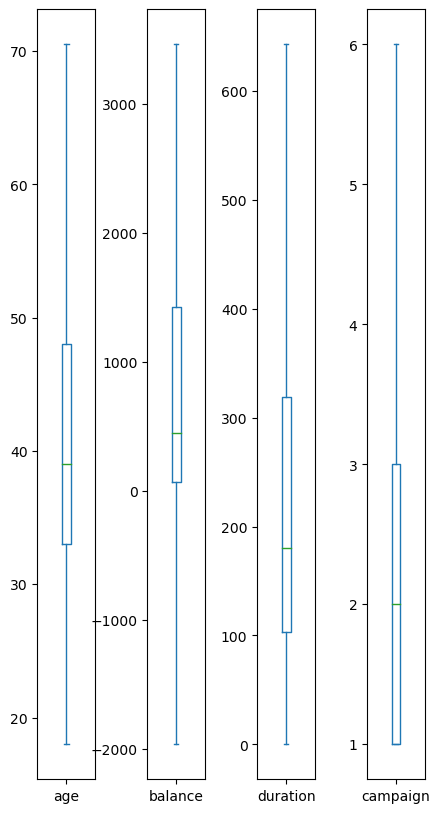

In [22]:
# box plot visualisation
cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,10))
plt.subplots_adjust(wspace = 0.9)
plt.show()

In [23]:
# extracting the remaining columns
rem_col = list(set.difference(set(list(X.columns)),set(col_names)))

In [24]:
# concatenate the data 
X1 = pd.concat([cleandata1, X[rem_col]], axis = 1)  # concatenated data will have new sequential index
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45211 non-null  float64
 1   balance          45211 non-null  float64
 2   duration         45211 non-null  float64
 3   campaign         45211 non-null  float64
 4   married          45211 non-null  int32  
 5   loan             45211 non-null  int32  
 6   jounemployed     45211 non-null  int32  
 7   joentrepreneur   45211 non-null  int32  
 8   johousemaid      45211 non-null  int32  
 9   single           45211 non-null  int32  
 10  divorced         45211 non-null  int32  
 11  joadmin.         45211 non-null  int32  
 12  poutfailure      45211 non-null  int32  
 13  housing          45211 non-null  int32  
 14  previous         45211 non-null  int32  
 15  con_unknown      45211 non-null  int32  
 16  jostudent        45211 non-null  int32  
 17  poutother   

In [25]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(X1)

In [26]:
scaled_data = pd.DataFrame(scale.transform(X1), columns = numeric_features)
scaled_data.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.435584,0.018027,0.533869,0.555838,0.160226,0.365380,0.278446,0.047245,0.002110,0.108403,...,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370
std,0.197998,0.133049,0.216955,0.496878,0.366820,0.274883,0.320022,0.114827,0.008376,0.310892,...,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.375000,0.000000,0.000000,0.160187,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.000000,0.444322,1.000000,0.000000,0.279938,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.571429,0.000000,0.625000,1.000000,0.000000,0.496112,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# Logistic Regression

In [27]:
logit_model = sm.Logit(Y, scaled_data ).fit()

Optimization terminated successfully.
         Current function value: 0.242142
         Iterations 10


In [28]:
logit_model.summary()  # P-value > 0.05 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45183
Method:                           MLE   Df Model:                           27
Date:                Wed, 22 Mar 2023   Pseudo R-squ.:                  0.3290
Time:                        00:01:29   Log-Likelihood:                -10947.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                -0.0909      0.115     -0.792      0.429      -0.316       0.134
default            -0.1723      0.163     -1.056      0.291      -0.492       0.147
balance             0.6957      0.079      8.759      0.000       0.540       0.851
housing            -0.7683      0.039    -19.480      0.000      -0.846      -0.691
loan               -0.5069      0.057     -8.853      0.000      -0.619      -0.395
duration            4.3404      0.061     71.003      0.000       4.221       4.460
campaign           -0.7119      0.065    -10.938      0.000      -0.839      -0.584
pdays               0.0401      0.271      0.148      0.882      -0.491       0.571
previous            2.6421      1.756      1.505      0.132      -0.799       6.083
poutfailure        -1.4366   1.21e+06  -1.19e-06      1.000   -2.37e+06    2.37e+06
poutother          -1.2121   1.23e+06  -9.86e-07      1.000   -2.41e+06    2.41e+06
poutsuccess         0.9657   1.22e+06    7.9e-07      1.000    -2.4e+06     2.4e+06
poutunknown        -1.7127   1.22e+06  -1.41e-06      1.000   -2.38e+06    2.38e+06
con_cellular       -0.7678   9.74e+05  -7.88e-07      1.000   -1.91e+06    1.91e+06
con_telephone      -0.7961   9.45e+05  -8.42e-07      1.000   -1.85e+06    1.85e+06
con_unknown        -1.8318    9.6e+05  -1.91e-06      1.000   -1.88e+06    1.88e+06
divorced           -1.1103   6.86e+05  -1.62e-06      1.000   -1.34e+06    1.34e+06
married            -1.3060   6.86e+05  -1.91e-06      1.000   -1.34e+06    1.34e+06
single             -0.9793   6.85e+05  -1.43e-06      1.000   -1.34e+06    1.34e+06
joadmin.           -0.1228        nan        nan        nan         nan         nan
joblue.collar      -0.5826        nan        nan        nan         nan         nan
joentrepreneur     -0.5422        nan        nan        nan         nan         nan
johousemaid        -0.6059        nan        nan        nan         nan         nan
jomanagement       -0.1656        nan        nan        nan         nan         nan
joretired           0.1922        nan        nan        nan         nan         nan
joself.employed    -0.3886        nan        nan        nan         nan         nan
joservices         -0.4185        nan        nan        nan         nan         nan
jostudent           0.4458        nan        nan        nan         nan         nan
jotechnician       -0.3406        nan        nan        nan         nan         nan
jounemployed       -0.3819        nan        nan        nan         nan         nan
jounknown          -0.4848        nan        nan        nan         nan         nan
===================================================================================
"""

In [29]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.329     
Dependent Variable:       y                    AIC:                  21950.9530
Date:                     2023-03-22 00:01     BIC:                  22195.0877
No. Observations:         45211                Log-Likelihood:       -10947.   
Df Model:                 27                   LL-Null:              -16315.   
Df Residuals:             45183                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           10.0000                                              
-------------------------------------------------------------------------------
                 Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------------
age             -0.0909       0.1149  -0.7916 0.4286       -0.3160       0.1342
default         -0.1723       0.1631  -1.0560 0.2910       -0.4920       0.1475
balance          0.6957       0.0794   8.7585 0.0000        0.5400       0.8513
housing         -0.7683       0.0394 -19.4797 0.0000       -0.8456      -0.6910
loan            -0.5069       0.0573  -8.8534 0.0000       -0.6191      -0.3947
duration         4.3404       0.0611  71.0030 0.0000        4.2206       4.4602
campaign        -0.7119       0.0651 -10.9378 0.0000       -0.8395      -0.5844
pdays            0.0401       0.2708   0.1482 0.8822       -0.4906       0.5709
previous         2.6421       1.7558   1.5047 0.1324       -0.7993       6.0834
poutfailure     -1.4366 1211522.8610  -0.0000 1.0000 -2374542.6105 2374539.7374
poutother       -1.2121 1229376.6522  -0.0000 1.0000 -2409535.1739 2409532.7497
poutsuccess      0.9657 1222849.9949   0.0000 1.0000 -2396740.9827 2396742.9141
poutunknown     -1.7127 1216011.7863  -0.0000 1.0000 -2383341.0186 2383337.5933
con_cellular    -0.7678  974044.8719  -0.0000 1.0000 -1909093.6361 1909092.1006
con_telephone   -0.7961  945203.3397  -0.0000 1.0000 -1852565.2999 1852563.7078
con_unknown     -1.8318  960082.9856  -0.0000 1.0000 -1881729.9059 1881726.2422
divorced        -1.1103  685852.9975  -0.0000 1.0000 -1344248.2840 1344246.0634
married         -1.3060  685516.7126  -0.0000 1.0000 -1343589.3734 1343586.7615
single          -0.9793  685180.2626  -0.0000 1.0000 -1342929.6170 1342927.6583
joadmin.        -0.1228          nan      nan    nan           nan          nan
joblue.collar   -0.5826          nan      nan    nan           nan          nan
joentrepreneur  -0.5422          nan      nan    nan           nan          nan
johousemaid     -0.6059          nan      nan    nan           nan          nan
jomanagement    -0.1656          nan      nan    nan           nan          nan
joretired        0.1922          nan      nan    nan           nan          nan
joself.employed -0.3886          nan      nan    nan           nan          nan
joservices      -0.4185          nan      nan    nan           nan          nan
jostudent        0.4458          nan      nan    nan           nan          nan
jotechnician    -0.3406          nan      nan    nan           nan          nan
jounemployed    -0.3819          nan      nan    nan           nan          nan
jounknown       -0.4848          nan      nan    nan           nan          nan
===============================================================================

"""

In [30]:
# AIC: 21950.9530 is too high, need to tune the hyperparameter and observe the improvement.

In [31]:
# Prediction
pred = logit_model.predict(scaled_data)
pred  # Probabilities

0        0.027509
1        0.012092
2        0.002655
3        0.005564
4        0.030880
           ...   
45206    0.556981
45207    0.479916
45208    0.970602
45209    0.244968
45210    0.305895
Length: 45211, dtype: float64

In [32]:
# ROC Curve to identify the appropriate cutoff value
fpr, tpr, thresholds = roc_curve(Y.y, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.09643588427589411

In [33]:
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.892354


In [34]:
# Filling all the cells with zeroes
scaled_data["pred"] = np.zeros(45211)

In [35]:
# taking threshold value and above the prob value will be treated as correct value 
scaled_data.loc[pred > optimal_threshold, "pred"] = 1

In [36]:
# Confusion Matrix
confusion_matrix(scaled_data.pred, Y.y)

array([[31439,   796],
       [ 8483,  4493]], dtype=int64)

In [37]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(scaled_data.pred, Y.y))

Test accuracy =  0.7947623365995001


In [38]:
# Classification report
classification = classification_report(scaled_data["pred"], Y)
print(classification)

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87     32235
         1.0       0.85      0.35      0.49     12976

    accuracy                           0.79     45211
   macro avg       0.82      0.66      0.68     45211
weighted avg       0.81      0.79      0.76     45211



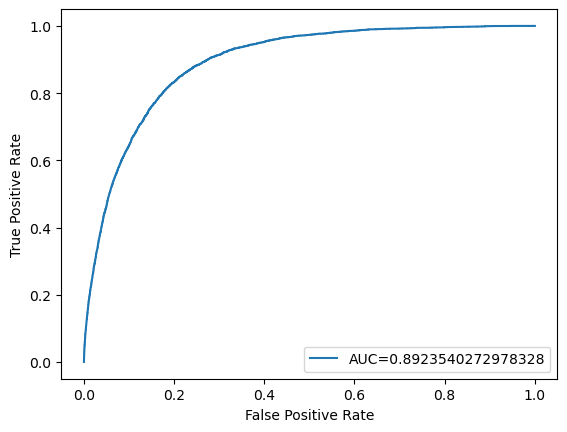

In [39]:
### PLOT FOR ROC
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [40]:
# Higher the AUC value better the model.

In [41]:
# Model evaluation - Data Split
x_train, x_test, y_train, y_test = train_test_split (scaled_data.iloc[:, :31], Y, 
                                                     test_size = 0.2, 
                                                     random_state = 0,
                                                     stratify = Y)

In [42]:
x_train.shape

(36168, 31)

In [43]:
x_test.shape

(9043, 31)

In [44]:
# Fitting Logistic Regression to the training set  
logisticmodel = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.241958
         Iterations 8


In [45]:
# Evaluate on train data
y_pred_train = logisticmodel.predict(x_train)  
y_pred_train

32213    0.080972
36907    0.871000
1447     0.006433
10973    0.012009
26982    0.008051
           ...   
41949    0.070392
22019    0.021128
643      0.030087
20094    0.043915
18       0.022917
Length: 36168, dtype: float64

In [46]:
# Metrics
# Filling all the cells with zeroes
y_train["pred"] = np.zeros(36168)

In [47]:
# taking threshold value and above the prob value will be treated as correct value 
y_train.loc[pred > optimal_threshold, "pred"] = 1

In [48]:
auc = metrics.roc_auc_score(y_train["y"], y_pred_train)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.893099


In [49]:
classification_train = classification_report(y_train["pred"], y_train["y"])
print(classification_train)

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87     25820
         1.0       0.85      0.35      0.49     10348

    accuracy                           0.80     36168
   macro avg       0.82      0.66      0.68     36168
weighted avg       0.81      0.80      0.76     36168



In [50]:
# confusion matrix 
confusion_matrix(y_train["pred"], y_train["y"])

array([[25182,   638],
       [ 6755,  3593]], dtype=int64)

In [51]:
# Accuracy score of the model
print('Train accuracy = ', accuracy_score(y_train["pred"], y_train["y"]))

Train accuracy =  0.7955927892059279


In [52]:
# Validate on Test data
y_pred_test = logisticmodel.predict(x_test)  
y_pred_test

32936    0.028426
1643     0.022616
8565     0.004768
7144     0.006677
32575    0.024447
           ...   
35507    0.292607
2186     0.003581
41085    0.056365
4735     0.002972
34290    0.065831
Length: 9043, dtype: float64

In [53]:
# Filling all the cells with zeroes
y_test["y_pred_test"] = np.zeros(9043)

In [54]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9043 entries, 32936 to 34290
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   y            9043 non-null   int32  
 1   y_pred_test  9043 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 176.6 KB


In [55]:
# Capturing the prediction binary values
y_test.loc[y_pred_test > optimal_threshold, "y_pred_test"] = 1

In [56]:
# classification report
classification1 = classification_report(y_test["y_pred_test"], y_test["y"])
print(classification1)

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87      6419
         1.0       0.85      0.34      0.49      2624

    accuracy                           0.79      9043
   macro avg       0.82      0.66      0.68      9043
weighted avg       0.80      0.79      0.76      9043



In [57]:
# confusion matrix 
confusion_matrix(y_test["y_pred_test"], y_test["y"])

array([[6261,  158],
       [1724,  900]], dtype=int64)

In [58]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test["y_pred_test"], y_test["y"]))

Test accuracy =  0.7918832245936083
